*Project Description*
Your client is a retail banking institution. Term deposits are a major source of income for a bank. A term deposit is a cash investment held at a financial institution. Your money is invested for an agreed rate of interest over a fixed amount of time, or term. The bank has various outreach plans to sell term deposits to their customers such as email marketing, advertisements, telephonic marketing and digital marketing. Telephonic marketing campaigns still remain one of the most effective way to reach out to people. However, they require huge investment as large call centers are hired to actually execute these campaigns. Hence, it is crucial to identify the customers most likely to convert beforehand so that they can be specifically targeted via call.
You are provided with the client data such as : age of the client, their job type, their marital status, etc. Along with the client data, you are also provided with the information of the call such as the duration of the call, day and month of the call, etc. Given this information, your task is to predict if the client will subscribe to term deposit.


In [8]:
#Import all the necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix

In [5]:
#Read and study the provided datasets

#Create Dataframe object (train dataset)

df = pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Bank%20Marketing/termdeposit_train.csv')
df

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


In [3]:
#Explore the dataset

df.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [4]:
df.tail()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no
31646,14156,55,management,divorced,secondary,no,204,yes,no,cellular,11,jul,1973,2,-1,0,unknown,yes


In [5]:
df.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [6]:
print("The dimension of the dataset:",df.shape)
print(f"\nThe column headers in the dataset: {df.columns}")

The dimension of the dataset: (31647, 18)

The column headers in the dataset: Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')


It was observed that the dataset contains 31647 rows and 18 columns out of which one is the variable / feature of interest ('subscribed')

In [7]:
#Check the description of the dataset and proceed with exploratory data analysis

df.describe()

,ID,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,22563.972162,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,13075.936990,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,2.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11218.000000,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,22519.000000,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33879.500000,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [8]:
df.dtypes

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

It could be observed that the dataset contains 2 different types of data (object and int64)

In [9]:
#Check the null (missing) values in the dataset

df.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

There was no null value in the dataset

In [10]:
#Brief about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


<Axes: >

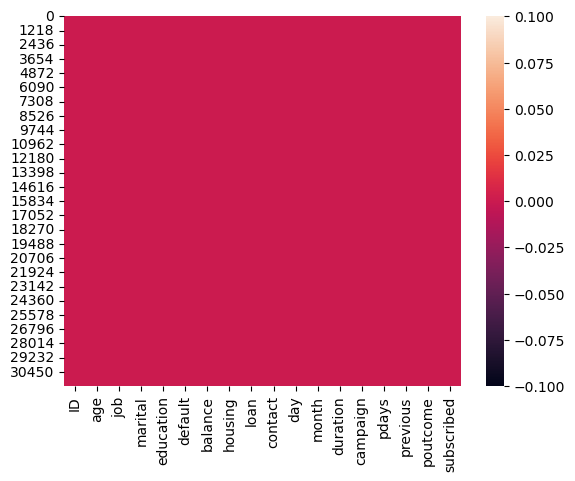

In [11]:
#Visualization with heatmap

sns.heatmap(df.isnull())

In [12]:
#Check the number of unique values in the dataset

df.nunique().to_frame("No. of unique values")

,No. of unique values
ID,31647
age,76
job,12
marital,3
education,4
default,2
balance,6326
housing,2
loan,2
contact,3


In [6]:
#This value should be checked per column as follows in order to see the value count per column

for i in df.columns:
    print(df[i].value_counts())
    print("\n")

ID
26110    1
13339    1
39681    1
15135    1
26037    1
        ..
1247     1
15584    1
25376    1
38699    1
14156    1
Name: count, Length: 31647, dtype: int64


age
32    1457
31    1417
33    1406
34    1321
35    1314
      ... 
92       1
95       1
93       1
94       1
90       1
Name: count, Length: 76, dtype: int64


job
blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: count, dtype: int64


marital
married     19095
single       8922
divorced     3630
Name: count, dtype: int64


education
secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: count, dtype: int64


default
no     31062
yes      585
Name: count, dtype: int64


balance
 0        2470
 1         137
 2         109
 4          95
 3          88
          ... 
 15120  

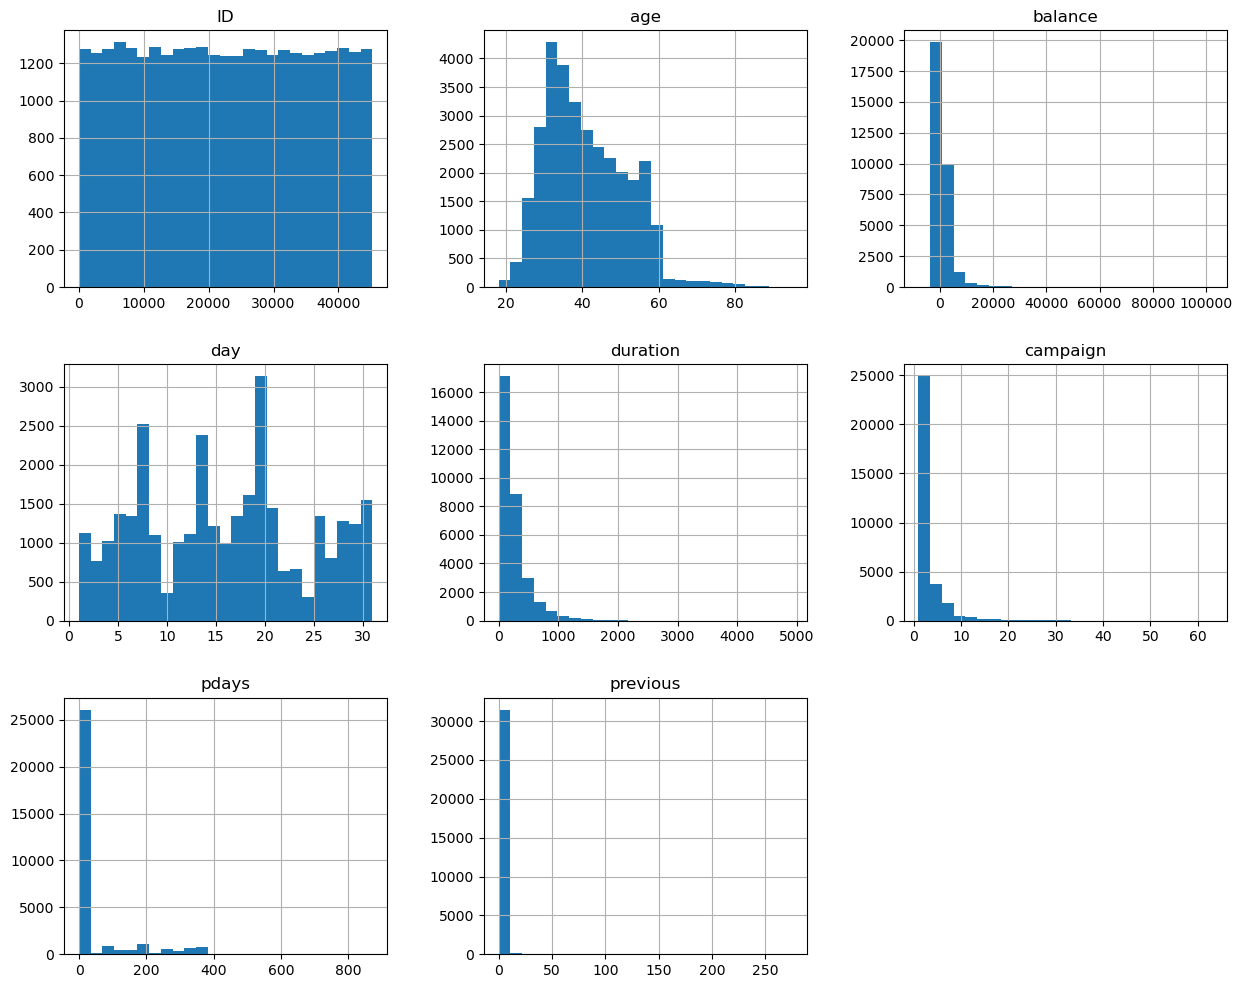

In [7]:
#Use visualization to further determine how the data is distributed on the features and display

df.hist(bins=25,figsize=(15,12))

plt.show()

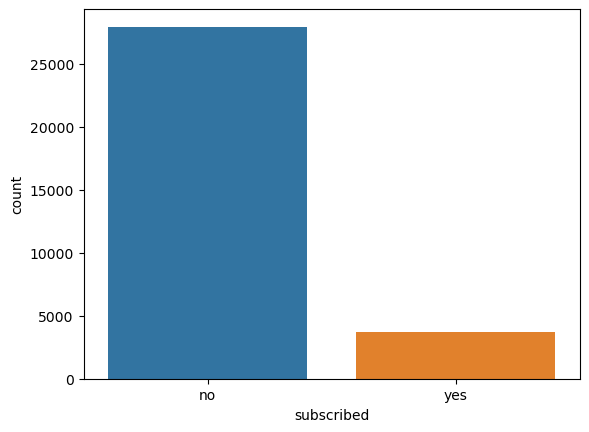

subscribed
no     27932
yes     3715
Name: count, dtype: int64

In [12]:
#Further exploratory analysis

sns.countplot(x='subscribed', data=df)
plt.show()
df['subscribed'].value_counts()

* It is observed that larger number of clients have not subscribed to term deposit when compared to the ones that have subscribed

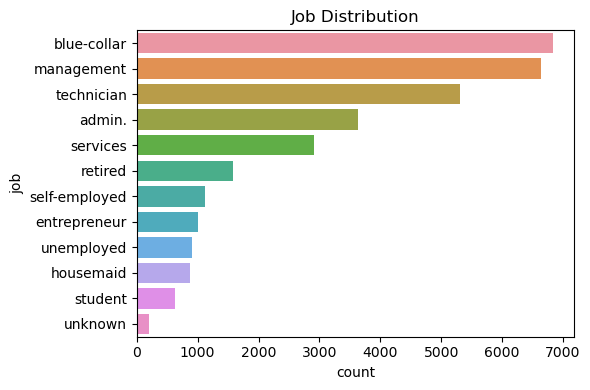

In [13]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, y='job', order = df['job'].value_counts().index)
plt.title('Job Distribution')
plt.tight_layout()
plt.show()

* The clients with job titles- blue-collar, management,technician and admin are the high prevalence and the least prevalence are the unemployee, housemaid, student and unknown for term deposit subscription

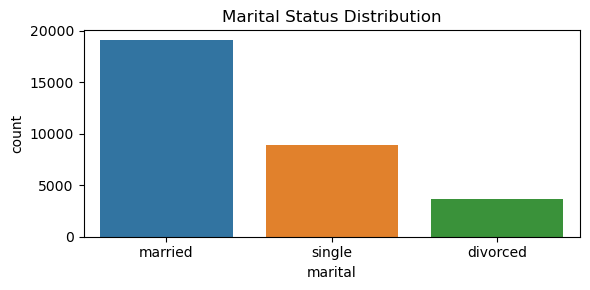

In [15]:
plt.figure(figsize=(6, 3))
sns.countplot(data=df, x='marital', order = df['marital'].value_counts().index)
plt.title('Marital Status Distribution')
plt.tight_layout()
plt.show()

It is observed that the majority of the clients are married individuals, and given the high prevalence 

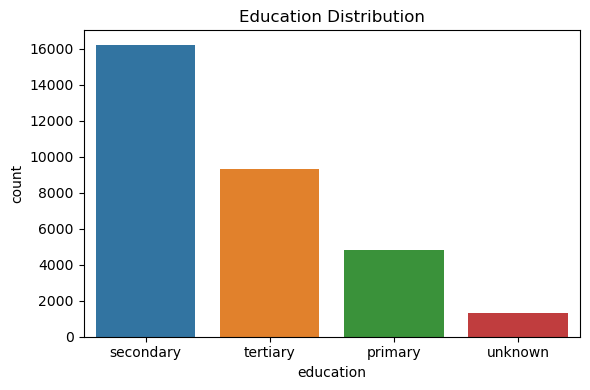

In [16]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='education', order = df['education'].value_counts().index)
plt.title('Education Distribution')
plt.tight_layout()
plt.show()

* The majority of clients have secondary education indicating that most clients have atleast completed high school.

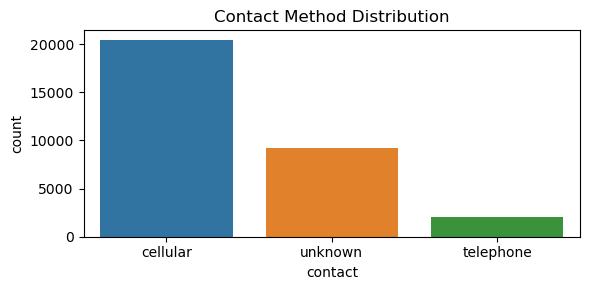

In [17]:
plt.figure(figsize=(6, 3))
sns.countplot(data=df, x='contact', order = df['contact'].value_counts().index)
plt.title('Contact Method Distribution')
plt.tight_layout()
plt.show()

* The ‘cellular’ method is the most commonly used means of contacting the clients. This suggests that mobile communication is the primary way of reaching out to clients

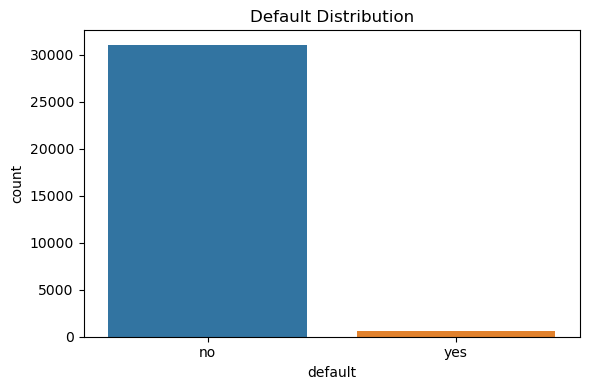

In [18]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='default', order = df['default'].value_counts().index)
plt.title('Default Distribution')
plt.tight_layout()
plt.show()

* The majority of the clients have no credit default.

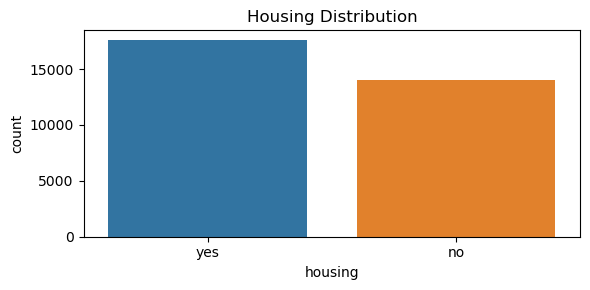

In [20]:
plt.figure(figsize=(6,3))
sns.countplot(data=df, x='housing', order = df['housing'].value_counts().index)
plt.title('Housing Distribution')
plt.tight_layout()
plt.show()

* Here, more clients have housing loans compared to those who do not and this could be a biggest challenge for further financial loan

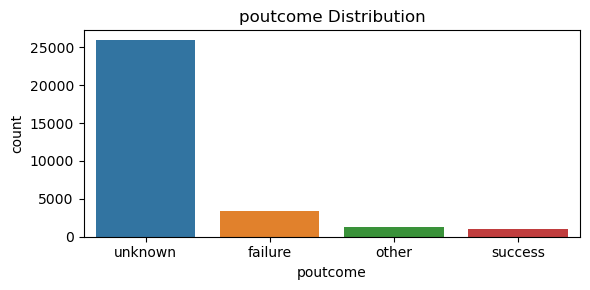

In [21]:
plt.figure(figsize=(6, 3))
sns.countplot(data=df, x='poutcome', order = df['poutcome'].value_counts().index)
plt.title('poutcome Distribution')
plt.tight_layout()
plt.show()

This is the distribution of the outcome of the previous marketing campaign. ‘unknown’ category has the highest count, indicating that for many clients, there is no information about the outcome of the previous campaign.


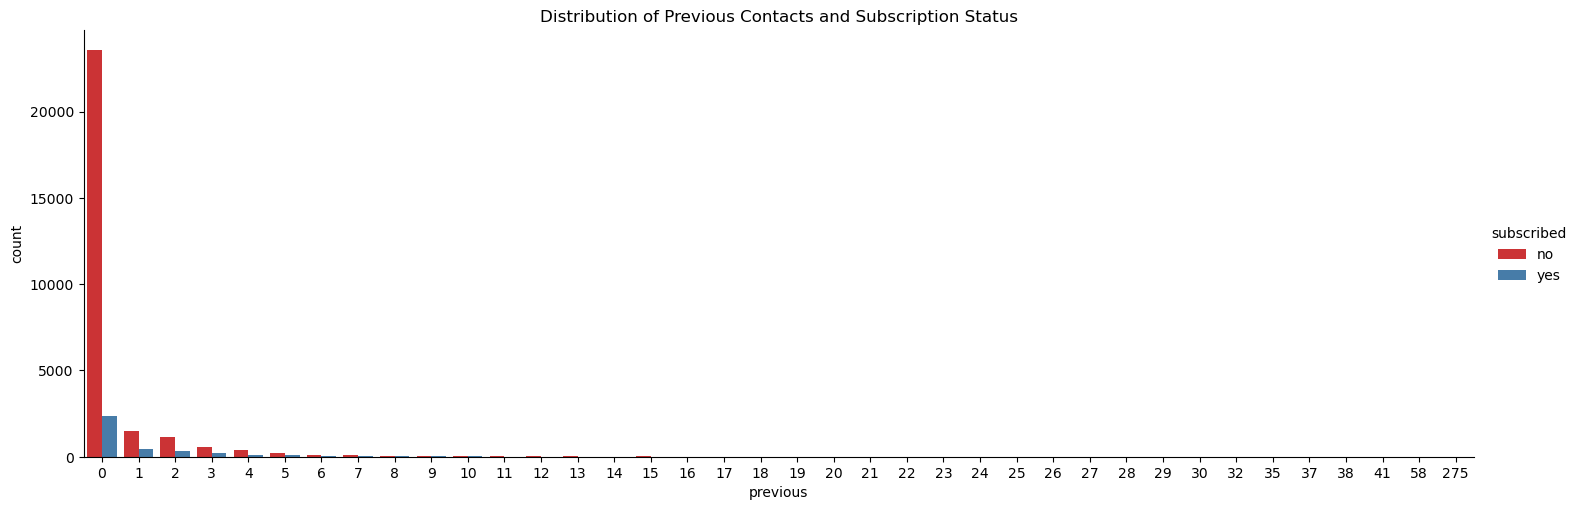

In [22]:
sns.catplot(x='previous', hue='subscribed', data=df, kind='count', palette='Set1', aspect=3)
plt.title('Distribution of Previous Contacts and Subscription Status')
plt.show()

* Above shows the count of clients who subscribed to a term deposit or not, categorized by the number of contacts made previously.

* Where the ‘NO’ subscription rate is higher when compared to ‘Yes’ indicating a lower success rate for term deposit subscriptions from previous contact of clients
